# Viscoporoelastic Model Inversion
Rahul Yerrabelli
2021

# Setup

In [1]:
#@title ## Basic imports

import sys
print(sys.version)
import importlib  # for reloading imports to source functions
#from IPython.display import HTML, Math
import IPython.display
import os

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections

import warnings
warnings.simplefilter("default")
#warnings.simplefilter('error'). # throws all warnings as errors
# How to display stack traces, options: Plain, Context (default), Verbose
%xmode Context 
# Turn on or off to cause debug mode to auto enter if exception is thrown
%pdb off

# Below code allows latex to be formatted nicely as google colab output
# Source: https://stackoverflow.com/a/61876185/2879686
def load_mathjax_in_cell_output():
  display(IPython.display.HTML("<script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register("pre_run_cell", load_mathjax_in_cell_output)

# Avoids scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Exception reporting mode: Context
Automatic pdb calling has been turned OFF


In [2]:
#@title ## Mount google drive and import my code

try:
    from google.colab import drive
    # drive.mount documentation can be accessed via: drive.mount?
    #Signature: drive.mount(mountpoint, force_remount=False, timeout_ms=120000, use_metadata_server=False)
    mountpoint_folder_name = "gdrive"  # can be anything, doesn't have to be drive
    drive.mount(os.path.join("/content/",mountpoint_folder_name), force_remount=True)  # mounts to a folder called mountpoint_folder_name
    new_path = os.path.join("/content/",mountpoint_folder_name,
                            "MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src")
    if new_path not in sys.path:
      sys.path.insert(0,new_path)
except ModuleNotFoundError:  # in case not run in Google colab
    import traceback
    traceback.print_exc()

#from src.inverting import euler_inversion
#from src import plotting
#from src import viscoporoelastic_model
#from src.viscoporoelastic_model import ViscoporoelasticModel
from inverting import euler_inversion
import plotting
import viscoporoelastic_model

<IPython.core.display.Javascript object>

Mounted at /content/gdrive


/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Key Points from Prior Paper
Yuan, D., Somers, S.M., Grayson, W.L. et al. A Poroelastic Model of a Fibrous-Porous Tissue Engineering Scaffold. Sci Rep 8, 5043 (2018). https://doi.org/10.1038/s41598-018-23214-8

## Figure 1
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-018-23214-8/MediaObjects/41598_2018_23214_Fig1_HTML.jpg?as=webp">

## Table 1
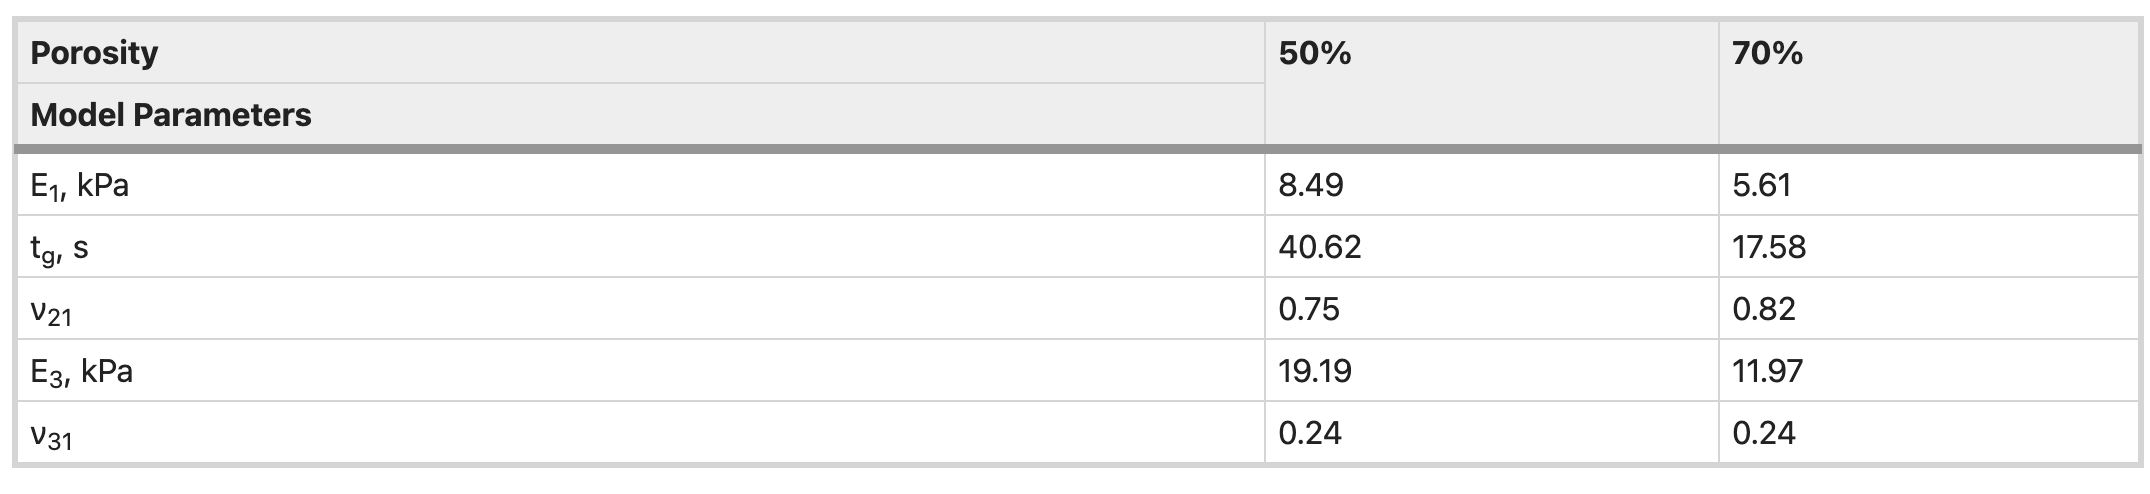

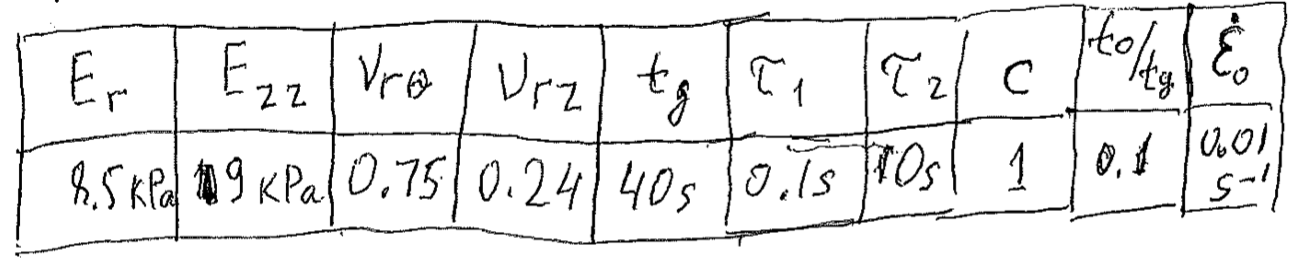

# Simple Laplace Model Inversion
$$ F(s)=\frac{1}{s-a} $$

<IPython.core.display.Javascript object>

/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/plotting.py:99: DeprecationWarning: deprecated
  warnings.warn("deprecated", DeprecationWarning)
/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/plotting.py:111: DeprecationWarning: deprecated
  warnings.warn("deprecated", DeprecationWarning)


It took 0.0000 sec to evaluate the Laplace space func for 100 input s vals.
It took 0.0126 sec to numerically invert Laplace the func for 999 input times.


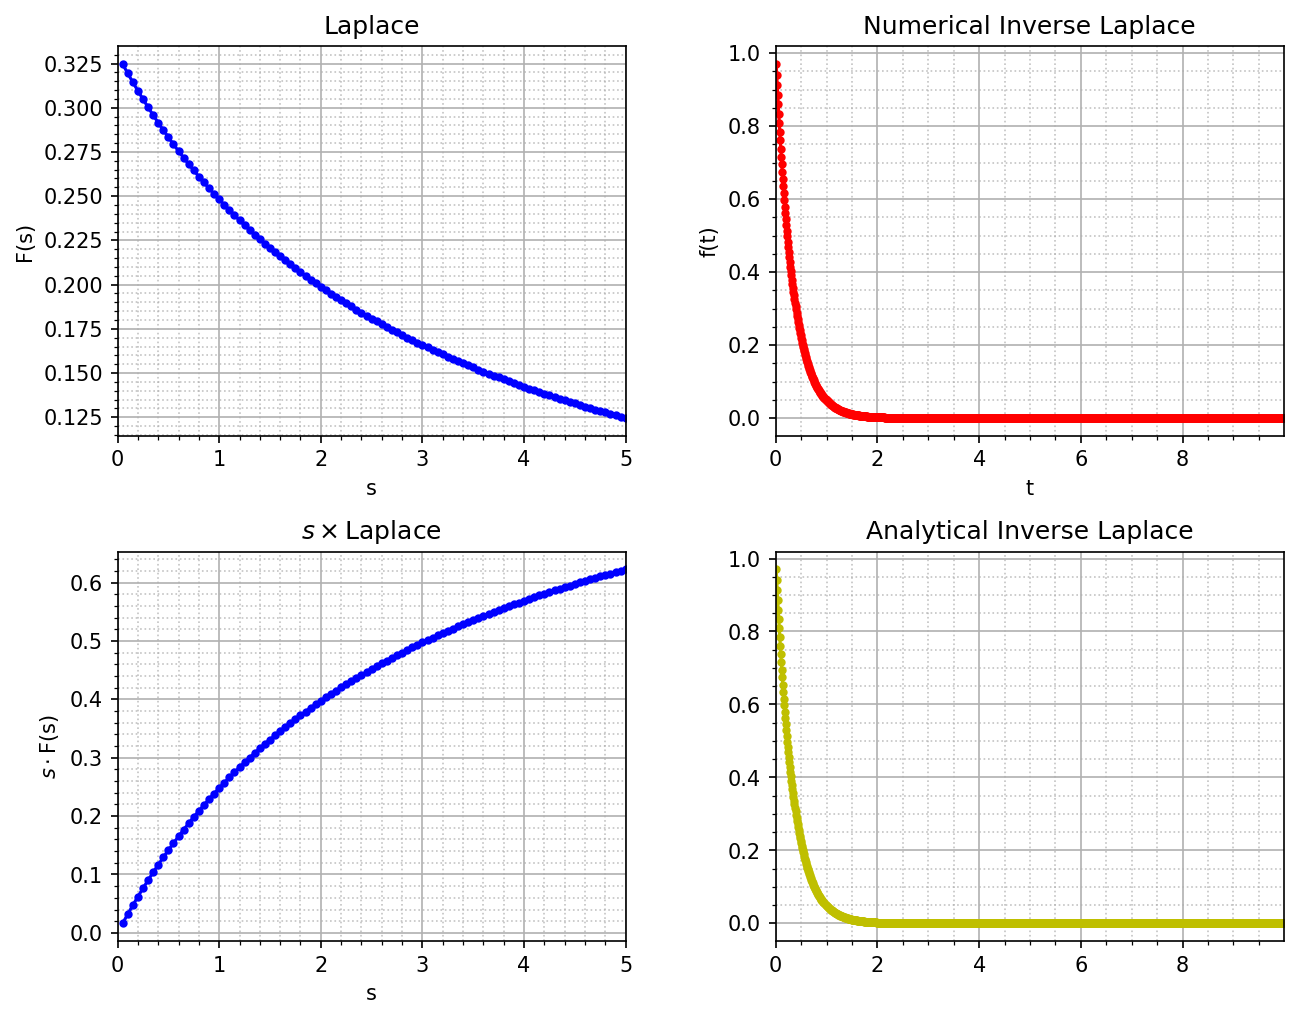

In [ ]:
#@markdown Simple Laplace - Numerical Inversion

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

anal_offset = 1
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.arange(0.1,100,0.1)/10000.0*10*anal_offset
times=np.arange(0.1,100,0.1)/100.0*10*anal_offset

# \rm gives roman style letters, which is indicative of a constant
#@markdown $$ F(s)=\frac{1}{s-a} $$
#@markdown $$ f(t)={\rm{e}}^{a t}$$.
a = -3.03 #@param {type:"number"}
funcs = lambda s: 1/(s-a)
inv_funcs_anal = lambda t: np.exp(a*t)

input_times = times
plot_times  = times
func_name = {"t":"f(t)", "s":"F(s)"}
x_names   = {"t":"t", "s":"s"}
input_s = np.arange(0.05, 5.05, 0.05)
input_times_anal = input_times /anal_offset
plot_times_anal = plot_times /anal_offset


fig=plotting.plot_laplace_analysis(funcs=funcs, func_name=func_name, time_const=1, 
                                   x_names=x_names, input_s=input_s, 
                                   input_times=input_times, plot_times=plot_times, 
                                   input_times_anal=input_times_anal, plot_times_anal=plot_times_anal, inv_funcs_anal=inv_funcs_anal )


# Cohen Model Inversion

<IPython.core.display.Javascript object>

It took 0.0019 sec to evaluate the Laplace space func for 1097 input s vals.
It took 0.2900 sec to numerically invert Laplace the func for 1001 input times.


/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:1205: RuntimeWarning: overflow encountered in exp
  for alpha2_N in alpha2_vals


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Value,Category
t0_tg,0.246184,Constant
tg,40.620000,Constant
strain_rate,0.010000,Constant
E1,8.500000,Constant
E3,19.000000,Constant
v21,0.750000,Constant
v31,0.240000,Constant
Δ1,0.198463,Calculated
Δ2,0.556704,Calculated
Δ3,2.481929,Calculated


array([   5.3610301 ,   30.06125439,   74.47854152,  138.63230093,
        222.52453078,  326.15569064,  449.52593136,  592.63531408,
        755.48386735,  938.07160598, 1140.39853824, 1362.46466905,
       1604.2700015 , 1865.81453758, 2147.09827865, 2448.12122564,
       2768.88337922, 3109.38473987, 3469.62530795, 3849.60508374])

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Value,Category
t0_tg,0.246184,Constant
tg,40.620000,Constant
strain_rate,0.010000,Constant
E1,3.500000,Constant
E3,19.000000,Constant
v21,0.750000,Constant
v31,0.240000,Constant
Δ1,0.228779,Calculated
Δ2,0.565365,Calculated
Δ3,2.186544,Calculated


array([   5.3016742 ,   30.0054949 ,   74.42321361,  138.57710671,
        222.46939485,  326.10058528,  449.47084399,  592.58023818,
        755.42879923,  938.01654336, 1140.34347965, 1362.40961352,
       1604.21494832, 1865.75948627, 2147.04322884, 2448.06617705,
       2768.82833164, 3109.32969313, 3469.57026193, 3849.55003832])

,t0_tg,tg,strain_rate,E1,E3,v21,v31,Δ1,Δ2,Δ3,C11,C12,C13,C33,C0,C1,C2
CohenModel - Line #1,0.246184,40.62,0.01,8.5,19,0.75,0.24,0.198463,0.556704,2.481929,23.843125,18.985983,10.278986,23.933913,0.203713,10.207851,31.232221
CohenModelModified - Line #2,0.246184,40.62,0.01,3.5,19,0.75,0.24,0.228779,0.565365,2.186544,8.649305,6.649305,3.671667,20.762400,0.231232,21.068372,36.889982


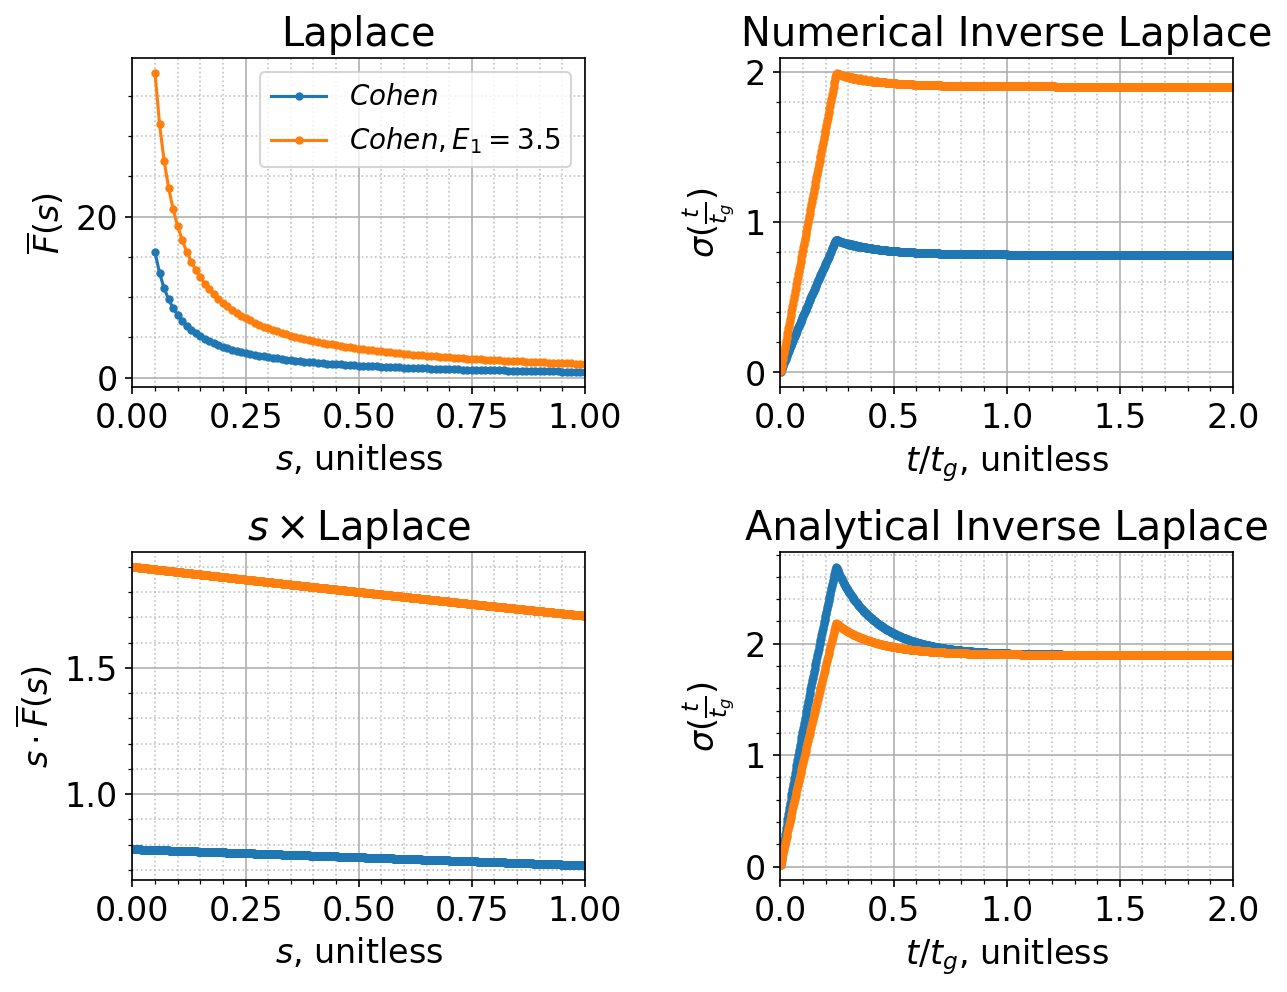

In [26]:
#@markdown Cohen Inversion

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)
from viscoporoelastic_model import CohenModel, CohenModel1998

def getCohenModelModified(**kwargs):
    class CohenModelModified(CohenModel):
        superclass = CohenModel
        t0_tg   = kwargs.get("t0_tg",   superclass.t0_tg)  #10 / 40.62;
        tg      = kwargs.get("tg",      superclass.tg)  #40.62  # sec
        strain_rate = kwargs.get("strain_rate", superclass.strain_rate)  #0.01;  # per sec
        E1      = kwargs.get("E1",      superclass.E1)  #8.5  # kPa
        E3      = kwargs.get("E3",      superclass.E3)  #19  # kPa
        v21     = kwargs.get("v21",     superclass.v21) #0.75  # like Vrtheta
        v31     = kwargs.get("v31",     superclass.v31) #0.24  # like Vrz
    return CohenModelModified()



VPEs = [(CohenModel(), fr"$Cohen$"), (getCohenModelModified(E1=3.5), fr"$Cohen, E_1=3.5$") ]

t0_tg = VPEs[0][0].t0_tg
tg = VPEs[0][0].tg

"""
func = []
import copy
func.append(vpe.laplace_value)
vpeB = copy.deepcopy(vpe)
vpeB.Vrtheta =  0.7
func.append(vpeB.laplace_value)
"""

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#plot_times = np.arange(0.01, 1.001, 0.001)*tg
plot_times = np.linspace(0.001, 2, num=1001, endpoint=True)*tg
#input_times = np.concatenate((plot_times, np.array([5,10,20])*tg))
input_times = plot_times
input_times_anal = input_times
plot_times_anal = plot_times/tg
#func = vpe.laplace_value
func = [vpe.laplace_value for vpe, label in VPEs]
inv_funcs_anal = [vpe.inverted_value for vpe, label in VPEs]
func_labels = [label for vpe, label in VPEs]
func_name = {"t":r"$\sigma(\frac{t}{t_g})$", "s":r"$\overline{\sigma}(s)$","t_anal":f"$f(t/tg)$"}
x_names   = {"t":r"$t/t_g$, unitless", "s":r"$s$, unitless","t_anal":"t/tg, unitless"}
plot_props = {
    "t":{"y":{"name":r"$\sigma(\frac{t}{t_g})$"}, "x":{"name":r"$t/t_g$, unitless", "scale":"linear"}},
    "s":{"y":{"name":r"$\overline{F}(s)$"},  "x":{"name":r"$s$, unitless"}},
    "t_anal":{"y":{"name":r"$\sigma(\frac{t}{t_g})$"}, "x":{"name":r"$t/t_g$, unitless", "scale":"linear"}},
}
plot_s = np.linspace(0.05, 1, num=96, endpoint=True)
plot_s_s = np.linspace(0.0005, 1, num=1000, endpoint=True) # for function x s
input_s = np.concatenate((plot_s, plot_s_s, np.array([0.001])))


plt.rc('font', size=16)  # default font size is 10
fig, axs, laplace_vals_all, inverted_vals_numerical_all, inverted_vals_analytical_all=plotting.plot_laplace_analysis(
    funcs=func, plot_props=plot_props, input_s=input_s, plot_s=plot_s, plot_s_s=plot_s_s,
    input_times=input_times, plot_times=plot_times, time_const=tg, 
    input_times_anal=input_times_anal, plot_times_anal=plot_times_anal, inv_funcs_anal=inv_funcs_anal,
    #model_name = VPEs[0][0].get_model_name(), 
    func_labels = func_labels)

itemindex = np.abs(input_times/tg - t0_tg).argmin()
for ind, ((vpe, label), laplace_vals, inverted_vals_numerical, inverted_vals_analytical) in enumerate(zip(VPEs, laplace_vals_all, inverted_vals_numerical_all, inverted_vals_analytical_all)):
    display(IPython.display.Latex(fr"\text{{ \#{ind+1}) {vpe.get_model_name()} with }} {label.replace('$','')}"))
    display(IPython.display.Math(fr"\text{{At }} t/t_g={input_times[itemindex]/tg:.3f}, \quad {func_name['t'].replace('$','')}={inverted_vals_numerical[itemindex]:0.5f}"))
    display(IPython.display.Math(fr"\text{{At }} t/t_g={input_times[-1]/tg:.3f}, \quad {func_name['t'].replace('$','')}={inverted_vals_numerical[-1]:0.5f}"))
    display(IPython.display.Math(fr"\text{{At }} s={input_s[0]:.3f}, \quad s\cdot{func_name['s'].replace('$','')}={laplace_vals[0]*input_s[0]:0.3f}"))
    display(vpe.get_var_df())
    display(vpe.alpha2_vals)

#df_params = pd.DataFrame(vpe.get_var_dict(),index=[vpe.get_model_name()])
#df_params = pd.DataFrame([vpe.get_var_dict() for vpe, label in VPEs], index=[vpe.get_model_name() + "-" + label for vpe, label in VPEs])
#df_params = pd.DataFrame([{**vpe.get_var_dict(), **{"lab":label}} for vpe, label in VPEs], index=[vpe.get_model_name() + "-" + label for vpe, label in VPEs])
df_params = pd.DataFrame([vpe.get_var_dict() for vpe, label in VPEs], index=[f"{vpe.get_model_name()} - Line #{ind+1}" for ind, (vpe, label) in enumerate(VPEs)])
display(df_params)

In [27]:
#VPEs = [(viscoporoelastic_model.CohenModel1998(), fr"$Cohen$") ]
for VPE, name in VPEs:
    print()
    print(name)
    t0_tg, tg, strain_rate, E1, E3, v21, v31 = vpe.get_predefined_constants()
    t0=t0_tg*tg
    delta1, delta2, delta3, C11, C12, C13, C33, C0, C1, C2 = vpe.get_calculable_constants()
    vpe.setup_constants(bessel_len=100)
    alpha2_vals = vpe.alpha2_vals

    print(f"strain_rate*t0*(2*C1-C2*C0)/(2-C0)=\t{strain_rate*t0*(2*C1-C2*C0)/(2-C0)}")
    print(f"strain_rate*t0*2*(1+v21)*E3/E1=\t{strain_rate*t0*2*(1+v21)*E3/E1}")
    print(f"strain_rate*t0*E3=\t{strain_rate*t0*E3}")
    print(f"2*(1+v21)*E3/E1=\t{strain_rate*t0*2*(1+v21)*E3/E1}")
    print(f"(2*C1-C2*C0)/(2-C0)=\t{(2*C1-C2*C0)/(2-C0)}")
    print(f"E3=\t{E3}")


<IPython.core.display.Javascript object>


$Cohen$
strain_rate*t0*(2*C1-C2*C0)/(2-C0)=	1.8999999999999986
strain_rate*t0*2*(1+v21)*E3/E1=	1.9000000000000001
strain_rate*t0*E3=	1.9000000000000001
2*(1+v21)*E3/E1=	1.9000000000000001
(2*C1-C2*C0)/(2-C0)=	18.999999999999986
E3=	19

$Cohen, E_1=3.5$
strain_rate*t0*(2*C1-C2*C0)/(2-C0)=	1.8999999999999986
strain_rate*t0*2*(1+v21)*E3/E1=	1.9000000000000001
strain_rate*t0*E3=	1.9000000000000001
2*(1+v21)*E3/E1=	1.9000000000000001
(2*C1-C2*C0)/(2-C0)=	18.999999999999986
E3=	19


In [16]:
"""
(2*C33*(C11+C12)-4*C13*C13)/(C11*(C11-C12)), 2*C1-C2*C0
(C11+C12)/C11, 2-C0

E3+2*v31*v31*E1/delta1, C33
E1/(1+v21), C11-C12
E1/delta1, C11+C12
strain_rate*t0*2*E3/E1*(1+v21)
"""

def getCohenModelModified(**kwargs):
    class CohenModelModified2(CohenModel):
        t0_tg = 10 / 40.62;
        tg = 40.62  # sec
        strain_rate = 0.01;  # per sec
        E1 = 8.5  # kPa
        E3 = kwargs.get("E3",19*1.5) or 19*1.5   # kPa
        v21 = 0.75  # like Vrtheta
        v31 = 0.24  # like Vrz
    return CohenModelModified2()


VPEs = [(CohenModel(), fr"$Cohen$"), (getCohenModelModified(), fr"$Cohen$2") ]
[VPE.laplace_value for VPE, name in VPEs]
print(CohenModel.E3)

<IPython.core.display.Javascript object>

19


<IPython.core.display.Javascript object>

[3.15377282e-08 4.46053371e-03 1.67565916e+00 1.67670166e+00
 1.67328351e+00 1.00000000e+00]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply
/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:1205: RuntimeWarning: overflow encountered in exp
  for alpha2_N in alpha2_vals
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


,t0_tg,tg,strain_rate,E1,E3,v21,v31,Δ1,Δ2,Δ3,C11,C12,C13,C33,C0,C1,C2
CohenModel1998 - Line #1,1,1,0.01,5,1,0.3,0,0.7,0.769231,1.098901,5.494505,1.648352,0.0,1.0,0.7,2.377143,5.826122


0.0052000000000000015

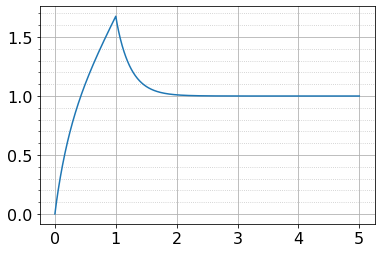

In [ ]:
"importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

VPEs = [(viscoporoelastic_model.CohenModel1998(), 
         fr"$Cohen$") ]

t0_tg, tg, strain_rate, E1, E3, v21, v31 = VPEs[0][0].get_predefined_constants()
t0=t0_tg*tg
delta1, delta2, delta3, _, _, _, _, C0, C1, C2 = VPEs[0][0].get_calculable_constants()
#VPEs[0][0].inverted_value(t=0)
VPEs[0][0].setup_constants(bessel_len=100)
alpha2_vals = VPEs[0][0].alpha2_vals

#sum(1/(alpha2_vals*(delta2*delta2*alpha2_vals - delta1/(1+v21)))) => 0.9785392135865333 for len=10,000
"""
print(E3)
print(sum(np.exp(-alpha2_vals * t0_tg)/(alpha2_vals*(delta2*delta2*alpha2_vals - delta1/(1+v21)))))
#alpha2_vals
print((1 - 2*v31*v31*E1/E3) / (1 - v21 - 2*v31*v31*E1/E3))
print((1 - v31*v31*E1/E3) / (1 - v21 - 2*v31*v31*E1/E3))
"""

input_times = np.linspace(0.00, 5, num=1001, endpoint=True) * tg
#output = VPEs[0][0].inverted_value(t=input_times)
t=input_times
output1 = E3*strain_rate*np.minimum(t, t0)
exp = np.exp
output2 = E1*strain_rate*tg*delta3*(1/8*(t<t0) - sum( (exp(-alpha2_N * t/tg) - exp(-alpha2_N * (t-t0)/tg )*(t>=t0) ) / (alpha2_N*(delta2*delta2*alpha2_N - delta1/(1+v21)))
                for alpha2_N in alpha2_vals
    ))
output = output1 + output2 #+ 4*E3*strain_rate*t0*(t<t0)
output = VPEs[0][0].inverted_value(t)
print(VPEs[0][0].inverted_value(t=np.array([0,0.001,t0*0.999,t0,t0*1.001,10]))/(E3*strain_rate*t0))

plt.figure()
plt.plot(input_times/(t0),output/(E3*strain_rate*t0) )
plt.grid(which="major")  # set major grid lines
plt.grid(which="minor", alpha=0.75, linestyle=":")  # set minor grid lines, but make them less visible
plt.axes().yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
df_params = pd.DataFrame([vpe.get_var_dict() for vpe, label in VPEs], index=[f"{vpe.get_model_name()} - Line #{ind+1}" for ind, (vpe, label) in enumerate(VPEs)])
display(df_params)



# Viscoporoelastic Models Inversions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0266 sec to evaluate the Laplace space func for 1097 input s vals.
Warning the function could not be inverted at some values of t as the I1(sqrt(f)) component led to +/- infinity. The indices of these time points are (array([0]),).
Warning the function could not be inverted at some values of t as the I1(sqrt(f)) component led to +/- infinity. The indices of these time points are (array([0]),).
Warning the function could not be inverted at some values of t as the I1(sqrt(f)) component led to +/- infinity. The indices of these time points are (array([0]),).
Warning the function could not be inverted at some values of t as the I1(sqrt(f)) component led to +/- infinity. The indices of these time points are (array([0]),).
Warning the function could not be inverted at some values of t as the I1(sqrt(f)) component led to +/- infinity. The indices of these time points are (array([0]),).
It took 1.1957 sec to numerically invert Laplace the func for 1001 input times.


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Value,Category
t0/tg,0.100,Constant
strain_rate,0.010,Constant
Vrz,0.240,Constant
Ezz,19.190,Constant
c,1.000,FittedParam
tau1,0.100,FittedParam
tau2,10.000,FittedParam
tg,40.620,FittedParam
Vrtheta,0.700,FittedParam
Err,8.490,FittedParam


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Value,Category
t0/tg,0.100,Constant
strain_rate,0.010,Constant
Vrz,0.240,Constant
Ezz,19.190,Constant
c,1.000,FittedParam
tau1,0.100,FittedParam
tau2,10.000,FittedParam
tg,40.620,FittedParam
Vrtheta,0.725,FittedParam
Err,8.490,FittedParam


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Value,Category
t0/tg,0.100,Constant
strain_rate,0.010,Constant
Vrz,0.240,Constant
Ezz,19.190,Constant
c,1.000,FittedParam
tau1,0.100,FittedParam
tau2,10.000,FittedParam
tg,40.620,FittedParam
Vrtheta,0.750,FittedParam
Err,8.490,FittedParam


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Value,Category
t0/tg,0.100,Constant
strain_rate,0.010,Constant
Vrz,0.240,Constant
Ezz,19.190,Constant
c,1.000,FittedParam
tau1,0.100,FittedParam
tau2,10.000,FittedParam
tg,40.620,FittedParam
Vrtheta,0.775,FittedParam
Err,8.490,FittedParam


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Value,Category
t0/tg,0.100,Constant
strain_rate,0.010,Constant
Vrz,0.240,Constant
Ezz,19.190,Constant
c,1.000,FittedParam
tau1,0.100,FittedParam
tau2,10.000,FittedParam
tg,40.620,FittedParam
Vrtheta,0.800,FittedParam
Err,8.490,FittedParam


,t0/tg,strain_rate,Vrz,Ezz,c,tau1,tau2,tg,Vrtheta,Err,t0
ViscoporoelasticModel1 - Line #1,0.1,0.01,0.24,19.19,1,0.1,10,40.62,0.700,8.49,4.062
ViscoporoelasticModel1 - Line #2,0.1,0.01,0.24,19.19,1,0.1,10,40.62,0.725,8.49,4.062
ViscoporoelasticModel1 - Line #3,0.1,0.01,0.24,19.19,1,0.1,10,40.62,0.750,8.49,4.062
ViscoporoelasticModel1 - Line #4,0.1,0.01,0.24,19.19,1,0.1,10,40.62,0.775,8.49,4.062
ViscoporoelasticModel1 - Line #5,0.1,0.01,0.24,19.19,1,0.1,10,40.62,0.800,8.49,4.062


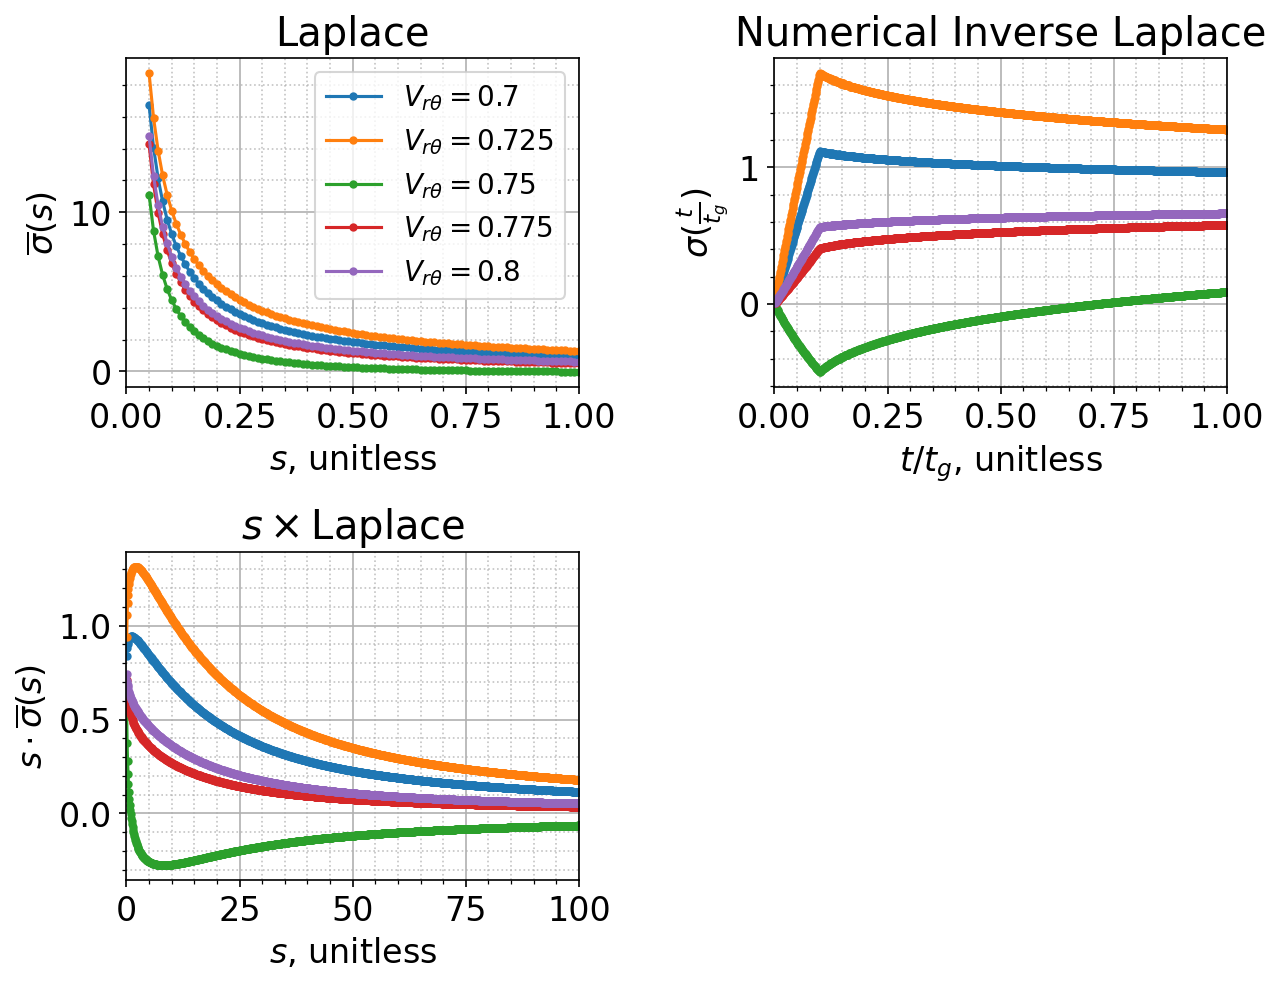

In [ ]:
#@title # ViscoporoelasticModel1


importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)
from viscoporoelastic_model import ViscoporoelasticModel1

#warnings.simplefilter('error') # throws all warnings as errors
#%pdb off

#@markdown Predefined constants
ViscoporoelasticModel1.t0_tg = 0.1 #@param {type:"number"} ; # 10 percent
ViscoporoelasticModel1.strain_rate = 0.01 #@param {type:"number"} ; # 1 percent per s (normally 1#/s)
## Below are directly determined by the mesh deformation part of the
## experiment (see our paper with Daniel).  -Dr. Spector
ViscoporoelasticModel1.Vrz = 0.24 #@param {type:"number"} ; # Not actually v, but greek nu (represents Poisson's ratio)
ViscoporoelasticModel1.Ezz =   19.19 #@param {type:"number"} ; # Note- don't mix up Ezz with epszz

#@markdown Fitted parameters (to be determined by experimental fitting to the unknown material)
## Fitted parameters (to be determined by experimental fitting to
# the unknown material)
c =   1 #@param {type:"number"} ;
tau1 =  0.1 #@param {type:"number"} ;  # units = sec
tau2 =  10 #@param {type:"number"} ;  # units = sec
#tau = [tau1, tau2];
#tau = [1 1];
tg=40.62 #@param {type:"number"}; #in units of s   # for porosity_sp == 0.5
Vrtheta =  0.75 #@param {type:"number"}; # Not actually v, but greek nu (represents Poisson's ratio)
Err =  8.49 #@param {type:"number"};

VPEs = [(ViscoporoelasticModel1(c=c,
                               tau1=tau1,
                               tau2=tau2, 
                               tg=tg, 
                               Vrtheta=Vrtheta, 
                               Err=Err), fr"$V_{{r\theta}}={Vrtheta}$") 
                              for Vrtheta in [0.7, 0.725, 0.75, 0.775, 0.8]]

t0_tg = VPEs[0][0].t0_tg

"""
func = []
import copy
func.append(vpe.laplace_value)
vpeB = copy.deepcopy(vpe)
vpeB.Vrtheta =  0.7
func.append(vpeB.laplace_value)
"""

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#plot_times = np.arange(0.01, 1.001, 0.001)*tg
plot_times = np.linspace(0.001, 1, num=1001, endpoint=True)*tg
#input_times = np.concatenate((plot_times, np.array([5,10,20])*tg))
input_times = plot_times
#func = vpe.laplace_value
func = [vpe.laplace_value for vpe, label in VPEs]
func_labels = [label for vpe, label in VPEs]
func_name = {"t":r"$\sigma(\frac{t}{t_g})$", "s":r"$\overline{\sigma}(s)$"}
x_names   = {"t":r"$t/t_g$, unitless", "s":r"$s$, unitless"}
plot_props = {
    "t":{"y":{"name":r"$\sigma(\frac{t}{t_g})$"}, "x":{"name":r"$t/t_g$, unitless", "scale":"linear"}},
    "s":{"y":{"name":r"$\overline{\sigma}(s)$"},  "x":{"name":r"$s$, unitless"}},
}
plot_s = np.linspace(0.05, 1, num=96, endpoint=True)
plot_s_s = np.linspace(0.05, 100, num=1000, endpoint=True) # for function x s
input_s = np.concatenate((plot_s, plot_s_s, np.array([0.001])))


plt.rc('font', size=16)  # default font size is 10
fig, axs, laplace_vals_all, inverted_vals_numerical_all, inverted_vals_analytical_all=plotting.plot_laplace_analysis(
    funcs=func, plot_props=plot_props, input_s=input_s, plot_s=plot_s, plot_s_s=plot_s_s,
    input_times=input_times, plot_times=plot_times, time_const=tg, 
    #model_name = VPEs[0][0].get_model_name(), 
    func_labels = func_labels)

itemindex = np.abs(input_times/tg - t0_tg).argmin()
for ind, ((vpe, label), laplace_vals, inverted_vals_numerical, inverted_vals_analytical) in enumerate(zip(VPEs, laplace_vals_all, inverted_vals_numerical_all, inverted_vals_analytical_all)):
    display(IPython.display.Latex(fr"\text{{ \#{ind+1}) {vpe.get_model_name()} with }} {label.replace('$','')}"))
    display(IPython.display.Math(fr"\text{{At }} t/t_g={input_times[itemindex]/tg:.3f}, \quad {func_name['t'].replace('$','')}={inverted_vals_numerical[itemindex]:0.5f}"))
    display(IPython.display.Math(fr"\text{{At }} t/t_g={input_times[-1]/tg:.3f}, \quad {func_name['t'].replace('$','')}={inverted_vals_numerical[-1]:0.5f}"))
    display(IPython.display.Math(fr"\text{{At }} s={input_s[0]:.3f}, \quad s\cdot{func_name['s'].replace('$','')}={laplace_vals[0]*input_s[0]:0.3f}"))
    display(vpe.get_var_df())

#df_params = pd.DataFrame(vpe.get_var_dict(),index=[vpe.get_model_name()])
#df_params = pd.DataFrame([vpe.get_var_dict() for vpe, label in VPEs], index=[vpe.get_model_name() + "-" + label for vpe, label in VPEs])
#df_params = pd.DataFrame([{**vpe.get_var_dict(), **{"lab":label}} for vpe, label in VPEs], index=[vpe.get_model_name() + "-" + label for vpe, label in VPEs])
df_params = pd.DataFrame([vpe.get_var_dict() for vpe, label in VPEs], index=[f"{vpe.get_model_name()} - Line #{ind+1}" for ind, (vpe, label) in enumerate(VPEs)])
display(df_params)


In [ ]:
#@title # ViscoporoelasticModel2
importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)
from viscoporoelastic_model import ViscoporoelasticModel2

VPEs = [(ViscoporoelasticModel2(t0_tg=t0_tg), fr"$t_0/t_g={t0_tg}$") 
                              for t0_tg in [1, 10]]
tg = VPEs[0][0].tg
t0_tg = VPEs[0][0].t0_tg

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
plot_times = np.linspace(0.01, 25, num=10001, endpoint=True)*tg
#plot_times = np.logspace(-3, 4, num=10001, endpoint=True)*tg
#input_times = plot_times
plot_times_log = np.logspace(-3, 3, num=10001, endpoint=True)*tg
input_times = np.concatenate((plot_times, plot_times_log))
func = [vpe.laplace_value for vpe, label in VPEs]
func_labels = [label for vpe, label in VPEs]
func_name = {"t":r"$T(\frac{t}{t_g})$", "s":r"$\overline{T}(s)$"}
x_names   = {"t":"$t/t_g$, unitless", "s":"$s$, unitless"}
plot_props = {
    "t":{"y":{"name":r"$T(\frac{t}{t_g})$"}, "x":{"name":"$t/t_g$, unitless", "scale":"linear"}},
    "s":{"y":{"name":r"$\overline{T}(s)$"},  "x":{"name":"$s$, unitless"}},
  }
plot_s = np.linspace(0.01, 0.4, num=1001, endpoint=True)
plot_s_s = np.linspace(1, 1000, num=1000, endpoint=True) # for function x s
input_s = np.concatenate((plot_s, plot_s_s, np.array([0.001])))

plt.rc('font', size=16)  # default font size is 10
fig, axs, laplace_vals_all, inverted_vals_numerical_all, inverted_vals_analytical_all=plotting.plot_laplace_analysis(
    funcs=func, plot_props=plot_props, input_s=input_s, plot_s=plot_s, plot_s_s=plot_s_s, 
    input_times=input_times, plot_times=plot_times, time_const=tg, 
    #model_name = VPEs[0][0].get_model_name(), 
    func_labels = func_labels)
ax01 = axs[0,1] if isinstance(axs[1], collections.abc.Container) else axs[1]
ax11 = axs[1,1] if isinstance(axs[1], collections.abc.Container) else axs[1]


ax_curr=ax11
ax_curr.axis("on")
for inverted_vals_numerical, func_label in zip(inverted_vals_numerical_all, func_labels):
    ax_curr.plot(plot_times_log/tg, inverted_vals_numerical[-len(plot_times_log):], ".-", label=func_label)
ax_curr.set_xlabel(plot_props.get("t").get("x").get("name"))   # plot_props["t"]["x"]["name"] 
#ax_curr.set_xscale(plot_props.get("t").get("x").get("scale") or "linear")
ax_curr.set_xscale("log")
ax_curr.set_xlim( [min(plot_times_log/tg), max(plot_times_log/tg)]) 
ax_curr.set_ylabel(plot_props.get("t").get("y").get("name"))  # plot_props["t"]["y"]["name"]
ax_curr.set_yscale(plot_props.get("t").get("y").get("scale") or "linear")
ax_curr.title.set_text("Numerical Inverse Laplace")
ax_curr.grid(which="major")
ax_curr.grid(which="minor", alpha=0.75, linestyle=":")
ax_curr.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10,subs=np.arange(2,10),numticks=10*ax01.xaxis.get_tick_space()))
ax_curr.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())


df_params = pd.DataFrame([vpe.get_var_dict() for vpe, label in VPEs], index=[vpe.get_model_name() for vpe, label in VPEs])
display(df_params)

<IPython.core.display.Javascript object>

It took 0.0106 sec to evaluate the Laplace space func for 1097 input s vals.
Warning the function could not be inverted at some (168/2002) values of t as the I1(sqrt(f)) component led to +/- infinity. The indices of these time points are 0-4,1001-1163. The values are [0.001      0.002999   0.004998   0.006997   0.008996   0.001
 0.00101391 0.00102802 0.00104232 0.00105682 0.00107152 0.00108643
 0.00110154 0.00111686 0.0011324  0.00114815 0.00116413 0.00118032
 0.00119674 0.00121339 0.00123027 0.00124738 0.00126474 0.00128233
 0.00130017 0.00131826 0.0013366  0.00135519 0.00137404 0.00139316
 0.00141254 0.00143219 0.00145211 0.00147231 0.00149279 0.00151356
 0.00153462 0.00155597 0.00157761 0.00159956 0.00162181 0.00164437
 0.00166725 0.00169044 0.00171396 0.0017378  0.00176198 0.00178649
 0.00181134 0.00183654 0.00186209 0.00188799 0.00191426 0.00194089
 0.00196789 0.00199526 0.00202302 0.00205116 0.0020797  0.00210863
 0.00213796 0.0021677  0.00219786 0.00222844 0.00225944 0.00229087


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,t0/tg,strain_rate,Vrz,Ezz,c,tau1,tau2,tg,Vrtheta,Err,t0
ViscoporoelasticModel3 - Line #1,0.246184,0.01,0.24,19,0.0,0.1,10,40.62,0.75,8.49,10.0
ViscoporoelasticModel3 - Line #2,0.246184,0.01,0.24,19,0.5,0.1,10,40.62,0.75,8.49,10.0
ViscoporoelasticModel3 - Line #3,0.246184,0.01,0.24,19,1.0,0.1,10,40.62,0.75,8.49,10.0
ViscoporoelasticModel3 - Line #4,0.246184,0.01,0.24,19,2.0,0.1,10,40.62,0.75,8.49,10.0


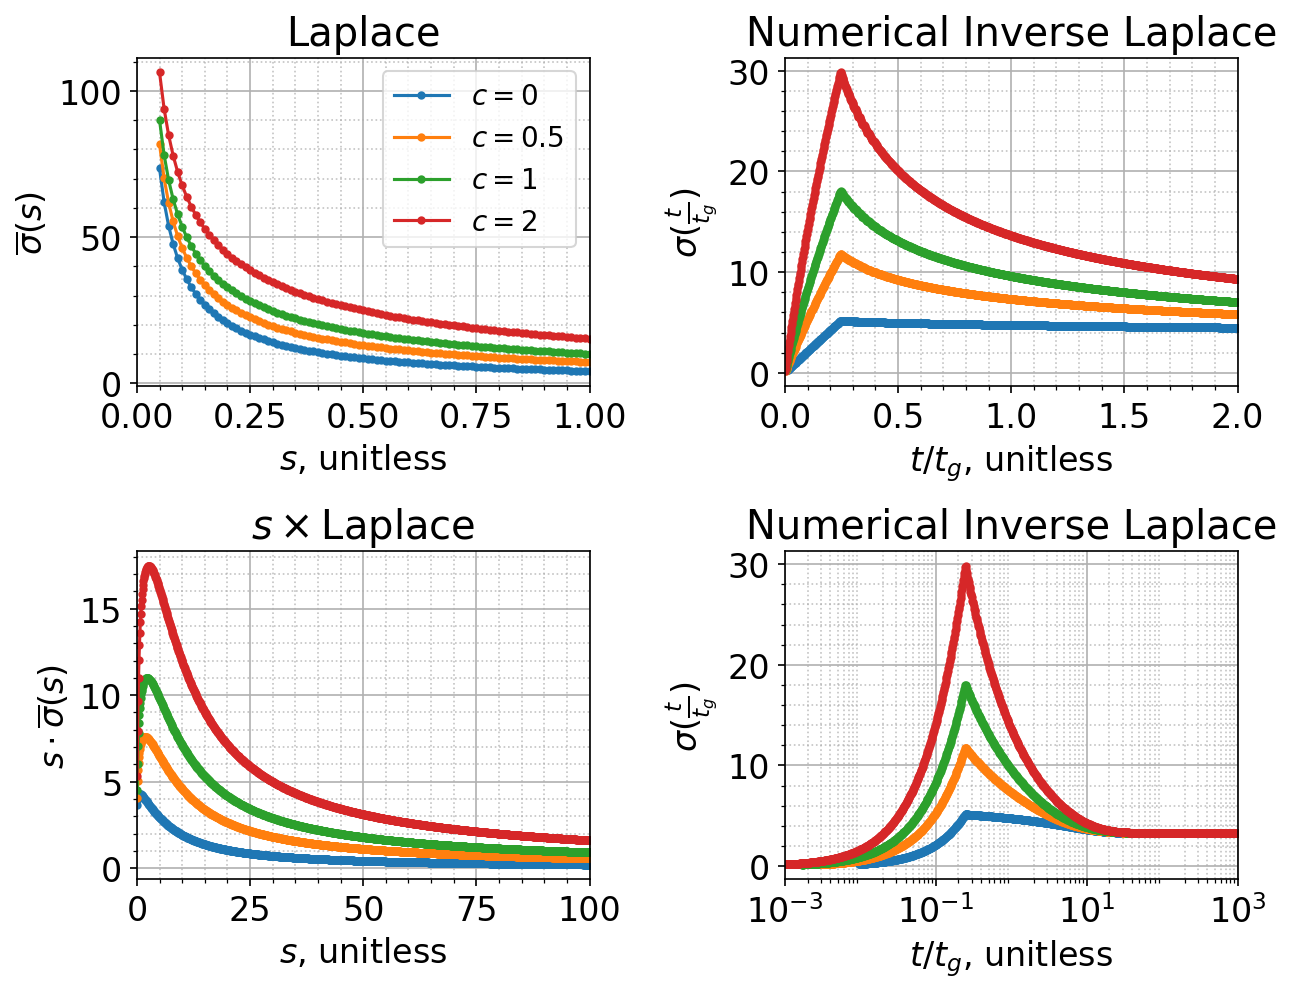

In [ ]:
#@title # ViscoporoelasticModel3
importlib.reload(plotting)
plotting.reload_imports()
importlib.reload(viscoporoelastic_model)
from viscoporoelastic_model import ViscoporoelasticModel3

ViscoporoelasticModel3.Ezz = 19  # kPa
ViscoporoelasticModel3.Vrz = 0.24  #unitless
ViscoporoelasticModel3.strain_rate = 0.01  # sec^-1

#@markdown Fitted parameters (to be determined by experimental fitting to the unknown material)
## Fitted parameters (to be determined by experimental fitting to
# the unknown material)
c =   1 #@param {type:"number"} ;
tau1 =  0.1 #@param {type:"number"} ;  # units = sec
tau2 =  10 #@param {type:"number"} ;  # units = sec
#tau = [tau1, tau2];
#tau = [1 1];
tg=40.62 #@param {type:"number"}; #in units of s   # for porosity_sp == 0.5
Vrtheta =  0.75 #@param {type:"number"}; # Not actually v, but greek nu (represents Poisson's ratio)
Err =  8.49 #@param {type:"number"};

VPEs = [(ViscoporoelasticModel3(c=c,
                               tau1=tau1,
                               tau2=tau2, 
                               tg=tg, 
                               Vrtheta=Vrtheta, 
                               Err=Err), fr"$c={c}$") 
                              for c in [0, 0.5, 1, 2]]

t0_tg = VPEs[0][0].t0_tg

"""
func = []
import copy
func.append(vpe.laplace_value)
vpeB = copy.deepcopy(vpe)
vpeB.Vrtheta =  0.7
func.append(vpeB.laplace_value)
"""

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#plot_times = np.arange(0.01, 1.001, 0.001)*tg
plot_times = np.linspace(0.001, 2, num=1001, endpoint=True)*tg
#input_times = np.concatenate((plot_times, np.array([5,10,20])*tg))
plot_times_log = np.logspace(-3, 3, num=1001, endpoint=True)*tg
input_times = np.concatenate((plot_times, plot_times_log))
#func = vpe.laplace_value
func = [vpe.laplace_value for vpe, label in VPEs]
func_labels = [label for vpe, label in VPEs]
func_name = {"t":r"$\sigma(\frac{t}{t_g})$", "s":r"$\overline{\sigma}(s)$"}
x_names   = {"t":r"$t/t_g$, unitless", "s":r"$s$, unitless"}
plot_props = {
    "t":{"y":{"name":r"$\sigma(\frac{t}{t_g})$"}, "x":{"name":r"$t/t_g$, unitless", "scale":"linear"}},
    "s":{"y":{"name":r"$\overline{\sigma}(s)$"},  "x":{"name":r"$s$, unitless"}},
}
plot_s = np.linspace(0.05, 1, num=96, endpoint=True)
plot_s_s = np.linspace(0.05, 100, num=1000, endpoint=True) # for function x s
input_s = np.concatenate((plot_s, plot_s_s, np.array([0.001])))


plt.rc('font', size=16)  # default font size is 10
fig, axs, laplace_vals_all, inverted_vals_numerical_all, inverted_vals_analytical_all=plotting.plot_laplace_analysis(
    funcs=func, plot_props=plot_props, input_s=input_s, plot_s=plot_s, plot_s_s=plot_s_s,
    input_times=input_times, plot_times=plot_times, time_const=tg, 
    #model_name = VPEs[0][0].get_model_name(), 
    func_labels = func_labels)

ax01 = axs[0,1] if isinstance(axs[1], collections.abc.Container) else axs[1]
ax11 = axs[1,1] if isinstance(axs[1], collections.abc.Container) else axs[1]


ax_curr=ax11
ax_curr.axis("on")
for inverted_vals_numerical, func_label in zip(inverted_vals_numerical_all, func_labels):
    ax_curr.plot(plot_times_log/tg, inverted_vals_numerical[-len(plot_times_log):], ".-", label=func_label)
ax_curr.set_xlabel(plot_props.get("t").get("x").get("name"))   # plot_props["t"]["x"]["name"] 
#ax_curr.set_xscale(plot_props.get("t").get("x").get("scale") or "linear")
ax_curr.set_xscale("log")
ax_curr.set_xlim( [min(plot_times_log/tg), max(plot_times_log/tg)]) 
ax_curr.set_ylabel(plot_props.get("t").get("y").get("name"))  # plot_props["t"]["y"]["name"]
ax_curr.set_yscale(plot_props.get("t").get("y").get("scale") or "linear")
ax_curr.title.set_text("Numerical Inverse Laplace")
ax_curr.grid(which="major")
ax_curr.grid(which="minor", alpha=0.75, linestyle=":")
ax_curr.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10,subs=np.arange(2,10),numticks=10*ax01.xaxis.get_tick_space()))
ax_curr.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())


itemindex = np.abs(input_times/tg - t0_tg).argmin()
for ind, ((vpe, label), laplace_vals, inverted_vals_numerical, inverted_vals_analytical) in enumerate(zip(VPEs, laplace_vals_all, inverted_vals_numerical_all, inverted_vals_analytical_all)):
    display(IPython.display.Latex(fr"\text{{ \#{ind+1}) {vpe.get_model_name()} with }} {label.replace('$','')}"))
    display(IPython.display.Math(fr"\text{{At }} t/t_g={input_times[itemindex]/tg:.3f}, \quad {func_name['t'].replace('$','')}={inverted_vals_numerical[itemindex]:0.5f}"))
    display(IPython.display.Math(fr"\text{{At }} t/t_g={input_times[-1]/tg:.3f}, \quad {func_name['t'].replace('$','')}={inverted_vals_numerical[-1]:0.5f}"))
    display(IPython.display.Math(fr"\text{{At }} s={input_s[0]:.3f}, \quad s\cdot{func_name['s'].replace('$','')}={laplace_vals[0]*input_s[0]:0.3f}"))
    #display(vpe.get_var_df())


#df_params = pd.DataFrame(vpe.get_var_dict(),index=[vpe.get_model_name()])
#df_params = pd.DataFrame([vpe.get_var_dict() for vpe, label in VPEs], index=[vpe.get_model_name() + "-" + label for vpe, label in VPEs])
#df_params = pd.DataFrame([{**vpe.get_var_dict(), **{"lab":label}} for vpe, label in VPEs], index=[vpe.get_model_name() + "-" + label for vpe, label in VPEs])
df_params = pd.DataFrame([vpe.get_var_dict() for vpe, label in VPEs], index=[f"{vpe.get_model_name()} - Line #{ind+1}" for ind, (vpe, label) in enumerate(VPEs)])
display(df_params)

# Laplace function relevant properties - for diagnosing errors
## Sources:
*   https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/LaplaceProps.html
*   https://lpsa.swarthmore.edu/LaplaceZTable/Common%20Laplace%20Transform%20Pairs.pdf

## Properties:  
1. Initial Value Theorem   
image.png

1. Final Value Theorem   
image.png

1. Time scaling.  
![image.png](https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/Funcs/imgB1.gif)

1. Multiplication by time.  
![image.png](https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/Funcs/imgAF.gif)

#Bessel info
Source: wolfram alpha

image.png

image.png

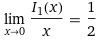

Source: https://www.mathworks.com/help/matlab/ref/besseli.html
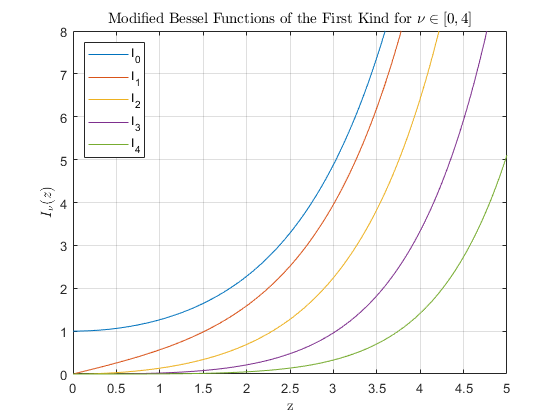

Source: http://www.mhtlab.uwaterloo.ca/courses/me755/web_chap4.pdf
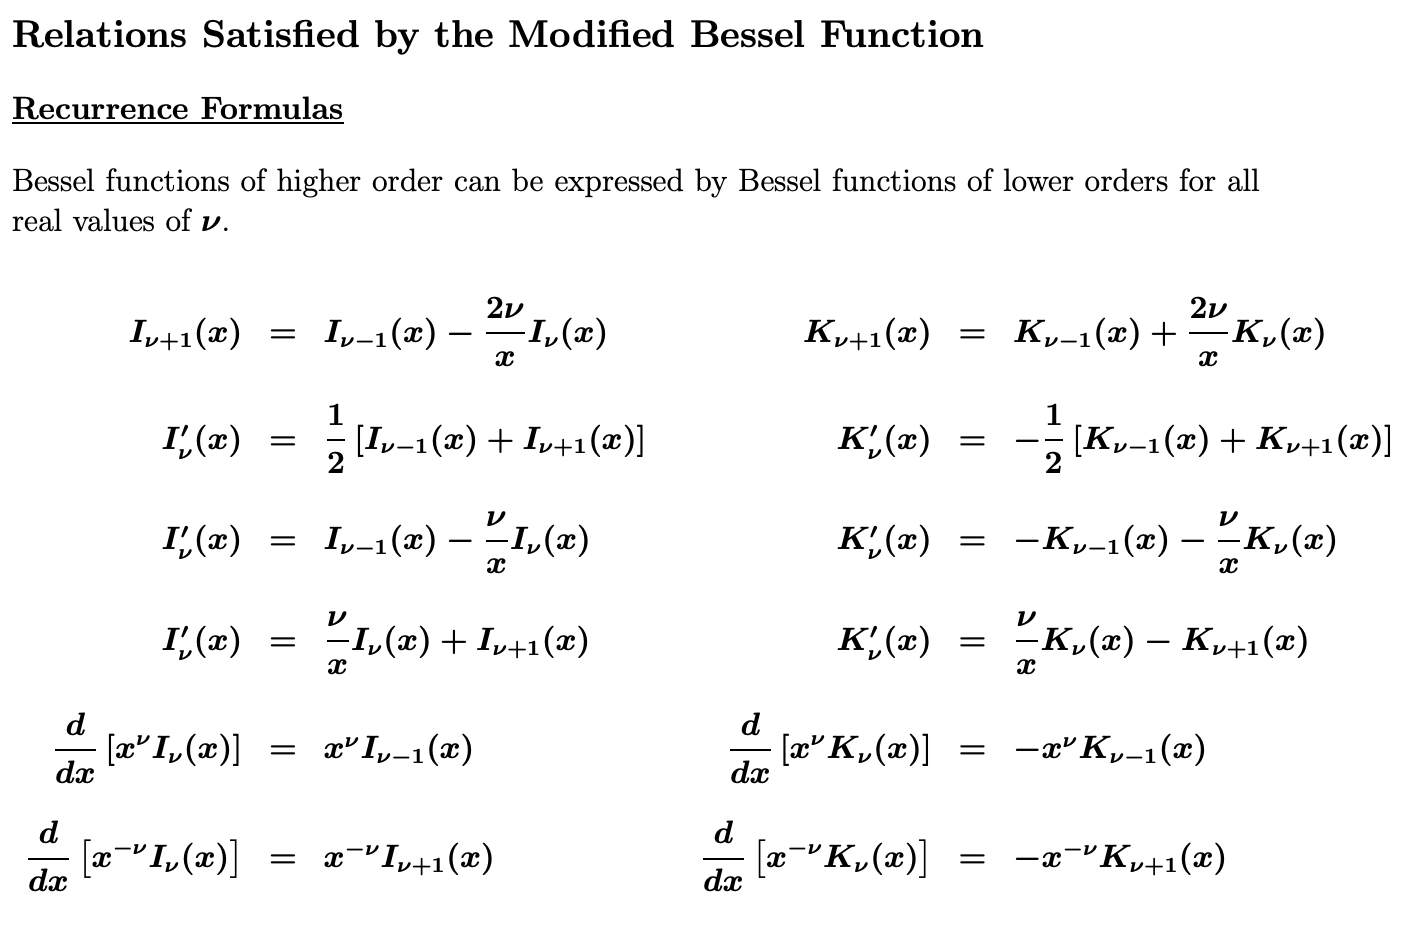

# Hyperbolic Trig Definitions
Source: https://en.wikipedia.org/wiki/Hyperbolic_functions#Exponential_definitions on 2021_07_13

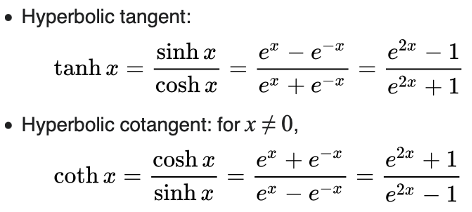